In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_theme(style="darkgrid")

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

import os

In [2]:
plt.rcParams["axes.labelsize"] = 16.
plt.rcParams["xtick.labelsize"] = 14.
plt.rcParams["ytick.labelsize"] = 14.
plt.rcParams["legend.fontsize"] = 12.
plt.rcParams["figure.figsize"] = [15., 6.]
SEED = 42

In [3]:
df = pd.read_csv("data/2008_test.csv", sep=",")
print(df.shape)
df.head()

(70000, 29)


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [5]:
""" 
не совпадающие имена столбцов с именами на сайте:
'UniqueCarrier' -> Reporting_Airline
'FlightNum' -> Flight_Number_Reporting_Airline
'TailNum' -> Tail_Number
"""

" \nне совпадающие имена столбцов с именами на сайте:\n'UniqueCarrier' -> Reporting_Airline\n'FlightNum' -> Flight_Number_Reporting_Airline\n'TailNum' -> Tail_Number\n"

### Наш датасет:

In [6]:
df = pd.read_csv("data/2016_01.csv", sep=",")
print(df.shape)
df.head()

(434354, 29)


,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,...,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2016,1,5,2,AA,N3EKAA,238,MIA,DCA,1415,...,0.0,150.0,144.0,126.0,919.0,15.0,0.0,0.0,0.0,0.0
1,2016,1,6,3,AA,N3KUAA,238,MIA,DCA,1415,...,0.0,150.0,148.0,128.0,919.0,NaN,NaN,NaN,NaN,NaN
2,2016,1,7,4,AA,N3AVAA,238,MIA,DCA,1415,...,0.0,150.0,148.0,123.0,919.0,18.0,0.0,0.0,0.0,6.0
3,2016,1,8,5,AA,N3DSAA,238,MIA,DCA,1415,...,0.0,150.0,171.0,116.0,919.0,0.0,0.0,52.0,0.0,0.0
4,2016,1,9,6,AA,N3DFAA,238,MIA,DCA,1415,...,0.0,150.0,158.0,121.0,919.0,NaN,NaN,NaN,NaN,NaN


In [7]:
df.isna().sum()

YEAR                        0
MONTH                       0
DAY_OF_MONTH                0
DAY_OF_WEEK                 0
OP_UNIQUE_CARRIER           0
TAIL_NUM                    0
OP_CARRIER_FL_NUM           0
ORIGIN                      0
DEST                        0
CRS_DEP_TIME                0
DEP_TIME                    0
DEP_DELAY                   0
TAXI_OUT                  127
TAXI_IN                   434
CRS_ARR_TIME                0
ARR_TIME                  434
ARR_DELAY                1056
CANCELLED                   0
CANCELLATION_CODE      434162
DIVERTED                    0
CRS_ELAPSED_TIME            0
ACTUAL_ELAPSED_TIME      1056
AIR_TIME                 1056
DISTANCE                    0
CARRIER_DELAY          363472
WEATHER_DELAY          363472
NAS_DELAY              363472
SECURITY_DELAY         363472
LATE_AIRCRAFT_DELAY    363472
dtype: int64

In [8]:
# pod_voprosom = ['TAIL_NUM', 'OP_CARRIER_FL_NUM', ]

In [9]:
data = df[['DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER',
           'ORIGIN', 'DEST', 'DEP_DELAY', 'TAXI_OUT',
           'TAXI_IN', 'CANCELLED', 'CANCELLATION_CODE',
           'DIVERTED', 'CRS_ELAPSED_TIME', 'DISTANCE'
          ]]

In [10]:
data.isna().sum()

DAY_OF_MONTH              0
DAY_OF_WEEK               0
OP_UNIQUE_CARRIER         0
ORIGIN                    0
DEST                      0
DEP_DELAY                 0
TAXI_OUT                127
TAXI_IN                 434
CANCELLED                 0
CANCELLATION_CODE    434162
DIVERTED                  0
CRS_ELAPSED_TIME          0
DISTANCE                  0
dtype: int64

In [11]:
data['TAXI_OUT'] = data['TAXI_OUT'].fillna(value=data['TAXI_OUT'].mean())
data['TAXI_IN'] = data['TAXI_IN'].fillna(value=data['TAXI_IN'].mean())
data['CANCELLATION_CODE'] = data['CANCELLATION_CODE'].fillna(value='NULL')

<ipython-input-11-83355b9ecd7a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TAXI_OUT'] = data['TAXI_OUT'].fillna(value=data['TAXI_OUT'].mean())
<ipython-input-11-83355b9ecd7a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TAXI_IN'] = data['TAXI_IN'].fillna(value=data['TAXI_IN'].mean())
<ipython-input-11-83355b9ecd7a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [12]:
data.isna().sum()

DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
ORIGIN               0
DEST                 0
DEP_DELAY            0
TAXI_OUT             0
TAXI_IN              0
CANCELLED            0
CANCELLATION_CODE    0
DIVERTED             0
CRS_ELAPSED_TIME     0
DISTANCE             0
dtype: int64

<AxesSubplot:>

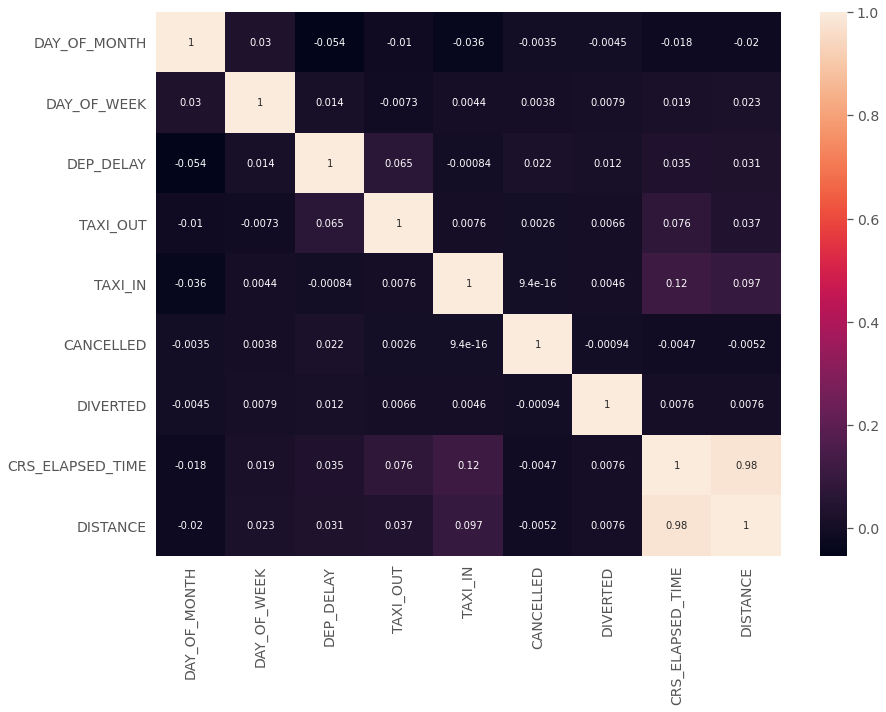

In [13]:
plt.figure(figsize=(14, 10))
sns.heatmap(data.corr(), annot=True)

<AxesSubplot:xlabel='DEP_DELAY', ylabel='Count'>

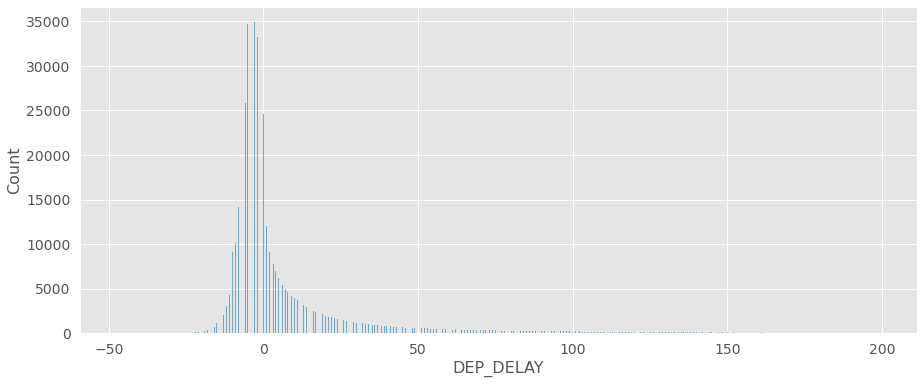

In [14]:
sns.histplot(data.query('DEP_DELAY < 200')['DEP_DELAY'])

In [15]:
data.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_DELAY,TAXI_OUT,TAXI_IN,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,DISTANCE
0,5,2,AA,MIA,DCA,21.0,13.0,5.0,0.0,NULL,0.0,150.0,919.0
1,6,3,AA,MIA,DCA,-1.0,15.0,5.0,0.0,NULL,0.0,150.0,919.0
2,7,4,AA,MIA,DCA,26.0,9.0,16.0,0.0,NULL,0.0,150.0,919.0
3,8,5,AA,MIA,DCA,31.0,28.0,27.0,0.0,NULL,0.0,150.0,919.0
4,9,6,AA,MIA,DCA,-1.0,19.0,18.0,0.0,NULL,0.0,150.0,919.0


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [21]:
onehot = pd.get_dummies(data, 
                        columns=['OP_UNIQUE_CARRIER', 'ORIGIN', 'DEST', 'CANCELLATION_CODE'],
                        drop_first=True
                       )

In [40]:
model = LinearRegression()

train = onehot.drop('DEP_DELAY', axis=1)[:150000]
target = onehot['DEP_DELAY'][:150000]

In [41]:
model.fit(train, target)

LinearRegression()

In [42]:
test = onehot.drop('DEP_DELAY', axis=1)[150000:170000]
target_test = onehot['DEP_DELAY'][150000:170000]

In [43]:
model.score(train, target)

0.02469934452743139

In [44]:
model.score(test, target_test)

-0.5889061700987821

In [78]:
only_double_train = data.drop(['OP_UNIQUE_CARRIER', 'ORIGIN', 'DEST', 'CANCELLATION_CODE', 'DEP_DELAY'],
                              axis=1)[:1000]
only_double_target = data['DEP_DELAY'][:1000]

In [79]:
model_only_double = LinearRegression()

In [80]:
model_only_double.fit(only_double_train, only_double_target)

LinearRegression()

In [84]:
only_double_test = data.drop(['OP_UNIQUE_CARRIER', 'ORIGIN', 'DEST', 'CANCELLATION_CODE', 'DEP_DELAY'],
                              axis=1)[251000:261000]
only_double_target_test = data['DEP_DELAY'][251000:261000]

In [85]:
model_only_double.score(only_double_train, only_double_target)

0.015503051593095285

In [86]:
model_only_double.score(only_double_test, only_double_target_test)

-0.013533369785231564

In [88]:
corr_with_dep = onehot.corrwith(onehot['DEP_DELAY']).sort_values(key=lambda x: abs(x), ascending=False)

In [90]:
corr_with_dep.head(30)

DEP_DELAY                 1.000000
TAXI_OUT                  0.065298
DEST_SFO                  0.062104
DAY_OF_MONTH             -0.053900
OP_UNIQUE_CARRIER_B6      0.042166
CRS_ELAPSED_TIME          0.034539
OP_UNIQUE_CARRIER_AS     -0.033813
DISTANCE                  0.031389
OP_UNIQUE_CARRIER_HA     -0.031279
OP_UNIQUE_CARRIER_NK      0.029180
ORIGIN_SFO                0.028402
ORIGIN_MIA                0.024468
ORIGIN_ORD                0.024047
CANCELLED                 0.022483
CANCELLATION_CODE_NULL   -0.022483
ORIGIN_FLL                0.021625
OP_UNIQUE_CARRIER_OO      0.020926
ORIGIN_HNL               -0.017202
OP_UNIQUE_CARRIER_VX      0.016836
OP_UNIQUE_CARRIER_WN     -0.016398
DEST_LGA                  0.016290
ORIGIN_ANC               -0.015513
ORIGIN_JFK                0.015364
DEST_JFK                  0.015189
OP_UNIQUE_CARRIER_EV     -0.014755
DAY_OF_WEEK               0.013792
ORIGIN_EWR                0.013517
DEST_LAS                  0.013294
OP_UNIQUE_CARRIER_UA

In [91]:
data.corrwith(onehot['DEP_DELAY']).sort_values(key=lambda x: abs(x), ascending=False)

DEP_DELAY           1.000000
TAXI_OUT            0.065298
DAY_OF_MONTH       -0.053900
CRS_ELAPSED_TIME    0.034539
DISTANCE            0.031389
CANCELLED           0.022483
DAY_OF_WEEK         0.013792
DIVERTED            0.012213
TAXI_IN            -0.000843
dtype: float64